<a href="https://colab.research.google.com/github/PlugInRichi/Aleph/blob/main/TensorFlow/Course2_Week1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [3]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('/content/drive/MyDrive/TensorFlow Course/diagnosis.csv')
dataset = pd_dat.values

In [13]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [14]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [15]:
# Build the input layers
from tensorflow.keras import Input, layers 

shape_inputs = (1,)
temperature = Input(shape=shape_inputs, name='temp')
nausea_occurence = Input(shape=shape_inputs, name='nausea')
lumbar_pain = Input(shape=shape_inputs, name='lumbp')
urine_pushing = Input(shape=shape_inputs, name='up')
micturition_pains = Input(shape=shape_inputs, name='mict')
bis = Input(shape=shape_inputs, name='bis')

In [22]:
# Create a list of all the inputs

list_inputs_A = [temperature, nausea_occurence, lumbar_pain]
list_inputs_B = [urine_pushing, micturition_pains, bis]

list_inputs = list_inputs_A + list_inputs_B

In [17]:
# Merge all input features into a single large vector

x_1 = layers.concatenate(list_inputs_A)
x_2 = layers.concatenate(list_inputs_B)

h_1 = layers.Dense(128, activation='tanh', name='hidden_A1')(x_1)
h_2 = layers.Dense(128, activation='tanh', name='hidden_B1')(x_2)

h_1 = layers.Dense(254, activation='tanh', name='hidden_A2')(h_1)
h_2 = layers.Dense(254, activation='tanh', name='hidden_B2')(h_2)

x = layers.concatenate([x_1, x_2])
h = layers.concatenate([h_1, h_2])

final = layers.concatenate([x, h])

In [18]:
# Use a logistic regression classifier for disease prediction

inflammation_pred =  layers.Dense(1, activation='sigmoid', name='inflam')(final)
nephritis_pred =  layers.Dense(1, activation='sigmoid', name='neph')(final)


In [19]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [23]:
# Create the model object

model = tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

#### Plot the model

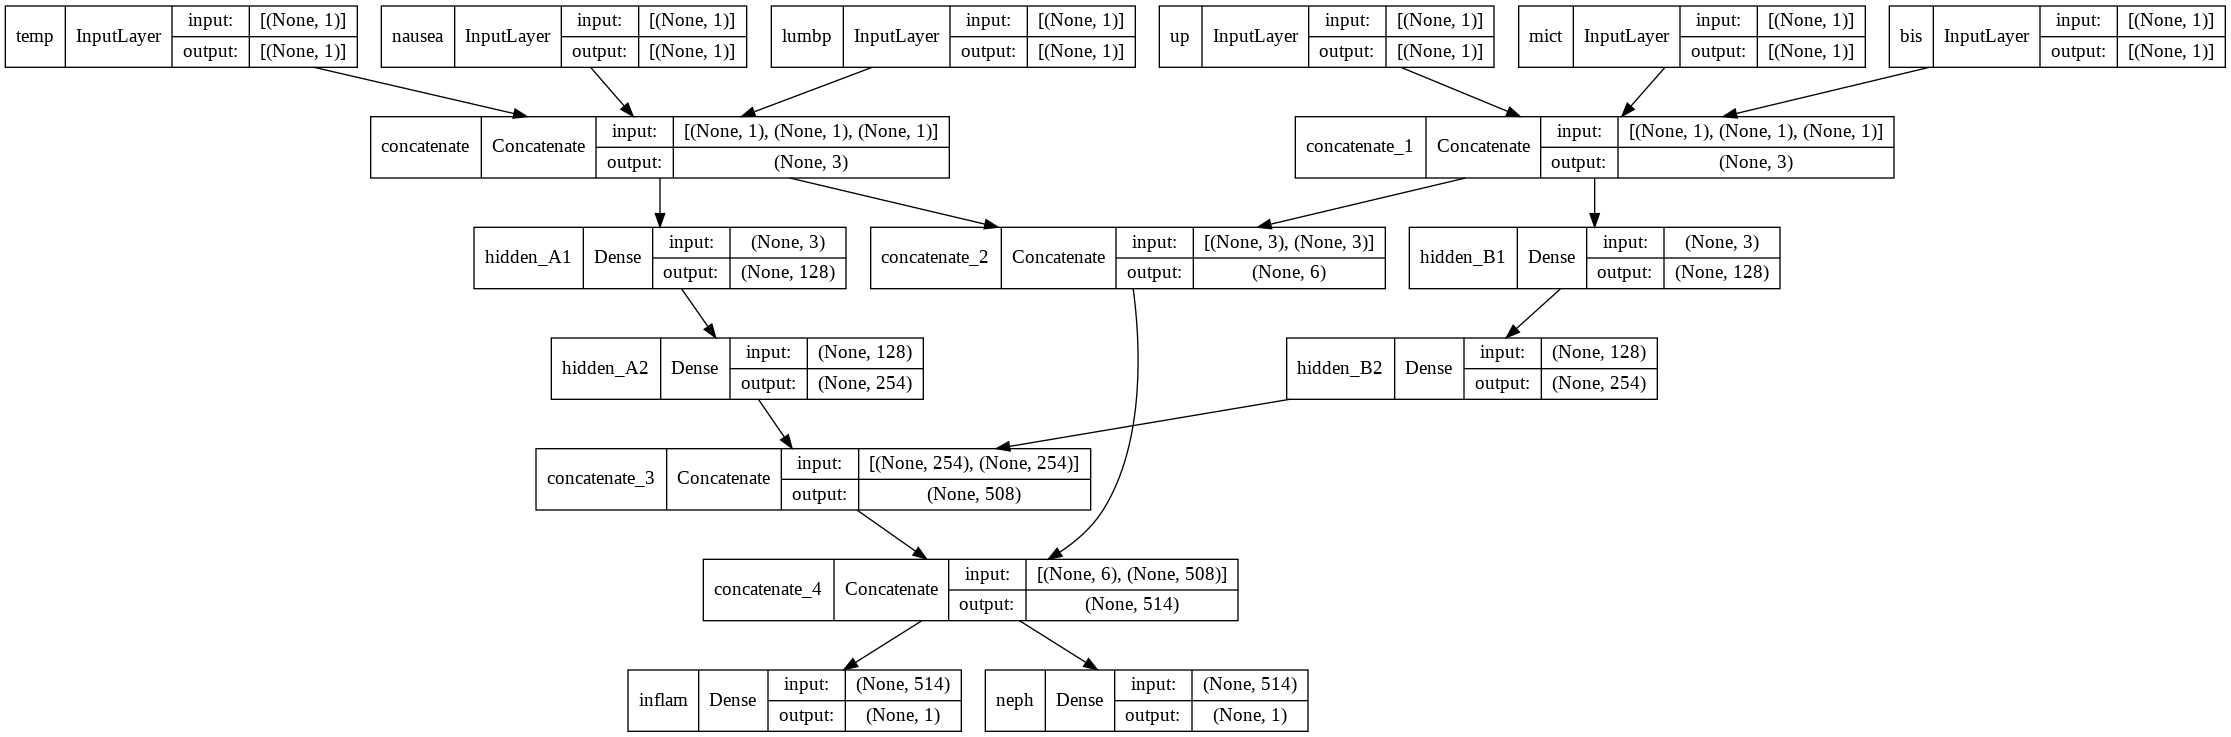

In [24]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model, show_shapes=True)

#### Compile the model

In [25]:
# Compile the model

model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss={'inflam':'binary_crossentropy',
                    'neph':'binary_crossentropy'}, #By default match every function within the order that oputputs were declared
              metrics=[['acc'], ['mse']], #Can be only one or one to every output layer Also this can be declared like loss functions
              loss_weights=[1,0.2])

#### Fit the model 

In [26]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nausea': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'neph': nephr_train}

#Also we can avoid set explicit names for creating ordered list for inputs and outputs

In [27]:
# Train the model
history = model.fit(x=inputs_train, y=outputs_train,
                    epochs=1000,
                    batch_size=128,
                    verbose=False)


#### Plot the learning curves

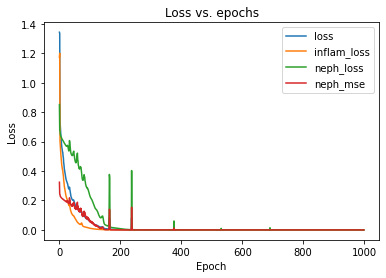

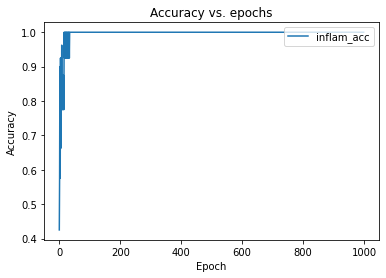

In [29]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

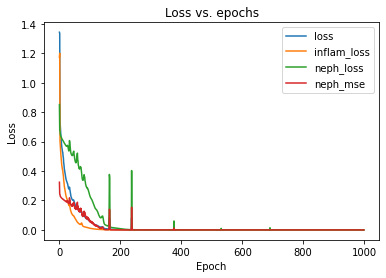

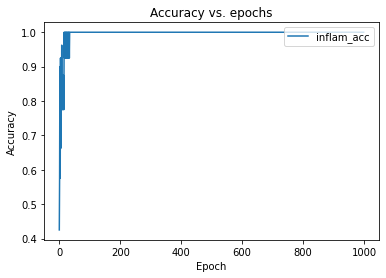

In [30]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [31]:
# Evaluate the model

model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],
[inflam_test, nephr_test])

2/2 [==============================] - 0s 13ms/step - loss: 3.3200e-08 - inflam_loss: 1.1842e-08 - neph_loss: 1.0679e-07 - inflam_acc: 1.0000 - neph_mse: 2.2399e-14


[3.320020525166001e-08,
 1.1842145042351149e-08,
 1.0679029571747378e-07,
 1.0,
 2.2399381408391185e-14]

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [32]:
import numpy as np

#### Create Variable objects

In [33]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [34]:
# Initialise a Variable value

tf.Variable(tf.constant(1.2, shape=(3,3)))

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1.2, 1.2, 1.2],
       [1.2, 1.2, 1.2],
       [1.2, 1.2, 1.2]], dtype=float32)>

#### Use and modify Variable values

In [35]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [36]:
# Increment the value of a Variable

v.assign_add(1)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [37]:
# Decrement the value of a Variable

v.assign_sub(2)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.0>


#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [38]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [39]:
# Obtain the value as a numpy array

x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [40]:
# Create a Tensor of type float32

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=tf.float32)
print(x)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)


In [44]:
# Create coefficients

coeffs = np.arange(16)

In [45]:
# Initialise shapes

shape1 = [8, 2]
shape2 = [4, 4]
shape3 = [8, 2]

In [46]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)


#### Useful Tensor operations

In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [ ]:
# Get the rank of a Tensor

rank = tf.rank(t)

In [ ]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
# Reshape a Tensor

t2 = tf.reshape(t, [20,2,2])

In [ ]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (20, 2, 2)


In [48]:
# Create ones, zeros, identity and constant Tensors

ones = tf.ones(shape=(2,5))
zeros = tf.zeros(shape=(7,1))
eye = tf.identity(6)
tensor7 = tf.constant(7.0, shape=8)

In [ ]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]], shape=(2, 5), dtype=float32)

 Zeros:
  tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(7, 1), dtype=float32)

 Identity:
  tf.Tensor(6, shape=(), dtype=int32)

 Tensor filled with 7:  tf.Tensor([7. 7. 7. 7. 7. 7. 7. 7.], shape=(8,), dtype=float32)


In [ ]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [ ]:
# Concatentate two Tensors

concat0 = tf.concat([t1, t2], 0)
concat1 = tf.concat([t1, t2], 1)

In [ ]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [ ]:
# Expanding the rank of Tensors

t1 = tf.expand_dims(t, 0)
t2 = tf.expand_dims(t, 2)
t3 = tf.expand_dims(t, 3)

In [ ]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 2, 1, 4) 
 t3 shape:  (3, 2, 4, 1)


In [ ]:
# Squeezing redundant dimensions

t1 = tf.squeeze(t1, 0)
t2 = tf.squeeze(t2, 2)
t3 = tf.squeeze(t3, 3)

In [ ]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [ ]:
# Slicing a Tensor

x = tf.constant([1,2,3,4,5])
print(x[2:19])

tf.Tensor([3 4 5], shape=(3,), dtype=int32)


#### Doing maths with Tensors

In [ ]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [ ]:
# Matrix multiplication

matmul_cd = tf.matmul(c,d)

In [ ]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)


 tf.matmul(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [ ]:
# Elementwise operations

c_times_d = c * d
c_minus_d = c - d
c_plus_d = c + d
c_div_d = c / d


In [ ]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_d)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[ 1.  2.]
 [inf  4.]], shape=(2, 2), dtype=float32)


In [ ]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [ ]:
# Absolute value of a Tensor

absx = tf.abs(x)

In [ ]:
# Power of a Tensor

powab = tf.pow(a,a)

In [ ]:
# Display the results

print("\n ", absx)
print("\n ", powab)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 4 27]
 [27 27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [ ]:
# Create a Tensor with samples from a Normal distribution

tn = tf.random.normal(shape=(2,2), mean=0, stddev=1)

In [ ]:
# Create a Tensor with samples from a Uniform distribution

tu = tf.random.uniform(shape=(4,5), minval=6, maxval=23, dtype='int32')

In [ ]:
# Create a Tensor with samples from a Poisson distribution

tp = tf.random.poisson((3,6), 5)

In [ ]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)

***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [ ]:
# Load the VGG19 model

from tensorflow.keras.applications import VGG19

vgg_model = VGG19()


574726144/574710816 [==============================] - 11s 0us/step


In [ ]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()
vgg_model.outputs

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

[<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>]

#### Build a model to access the layer outputs

In [ ]:
from tensorflow.keras.models import Model
import numpy as np

In [ ]:
# Build a model that returns the layer outputs

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs=vgg_input, outputs=layer_outputs)
layer_outputs #Las salidas que nos va a interesar conocer.

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv4')>,

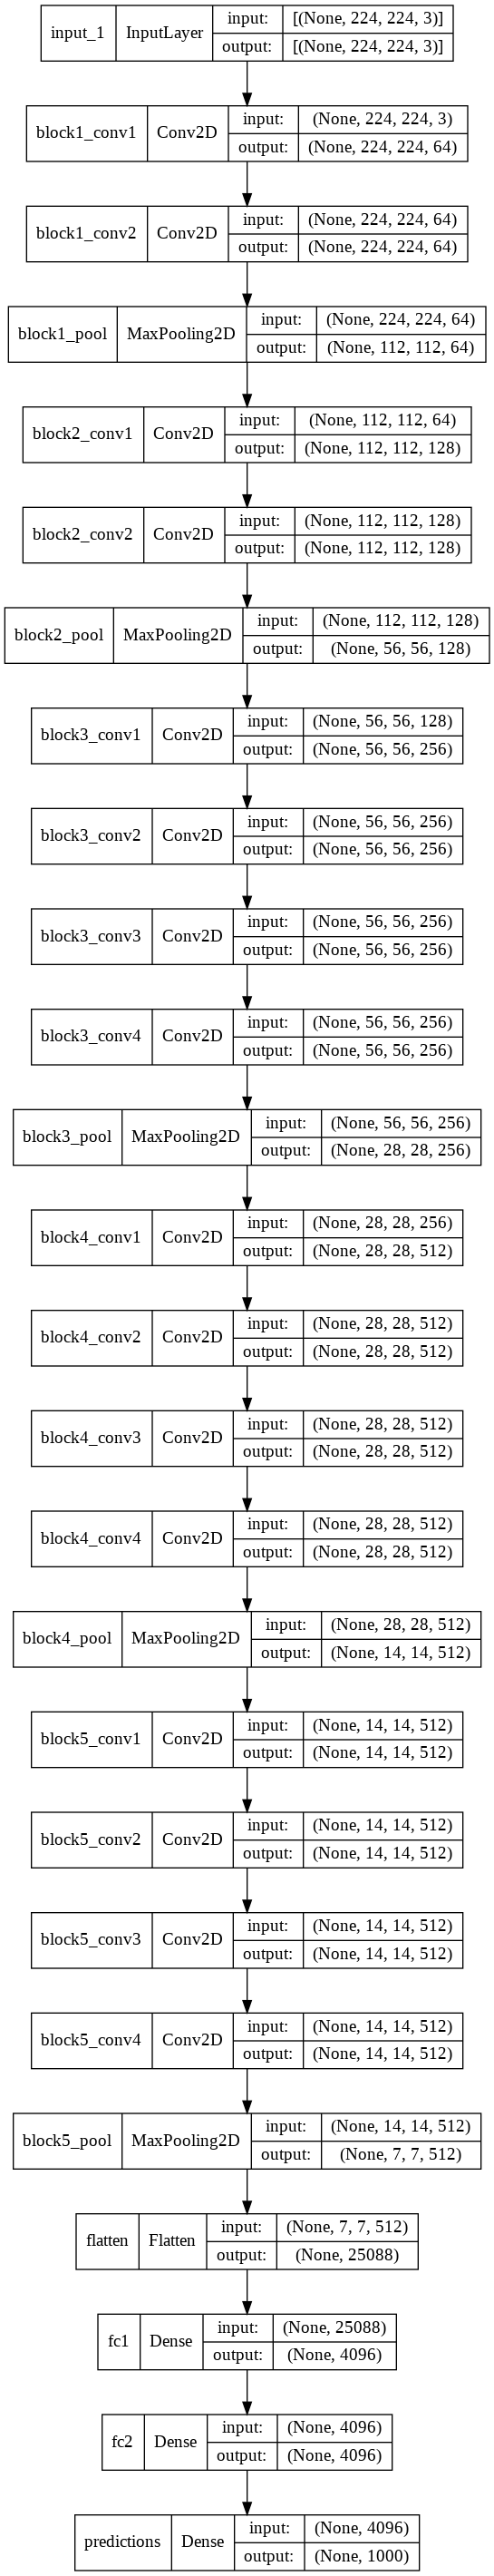

In [ ]:
# Plot the model

tf.keras.utils.plot_model(features, show_shapes=True)

In [ ]:
# Test the model on a random input

img = np.random.random((1,224,224,3)).astype('int32')
extract_features = features(img)

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

#### Import the picture

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L

You should store this file in Drive for use in this Colab notebook.

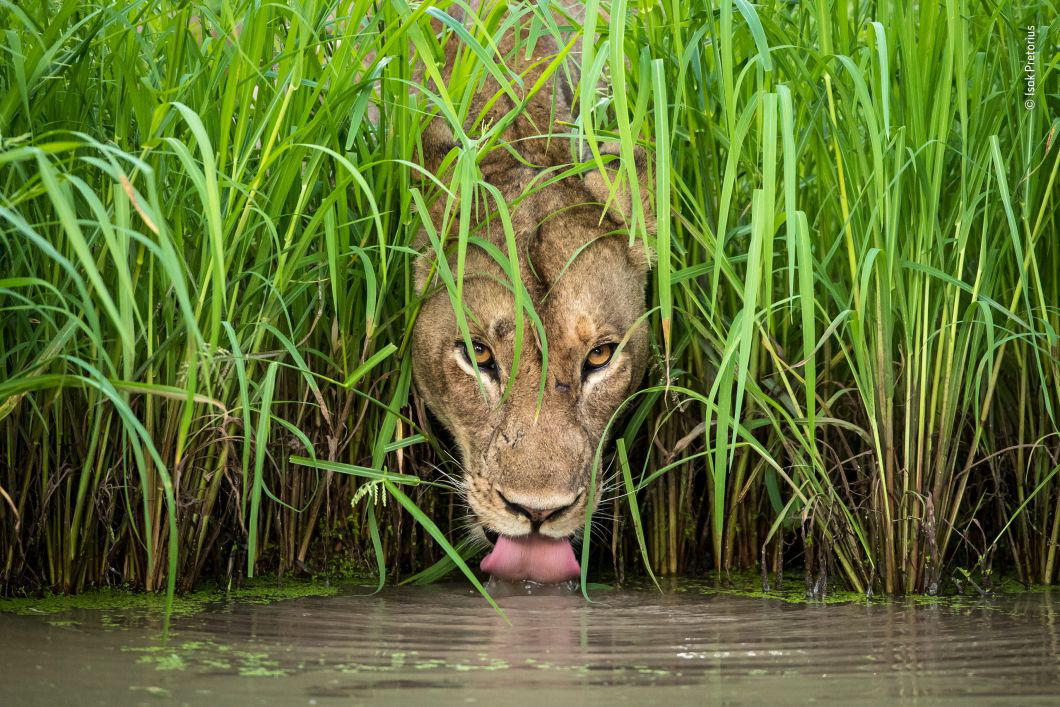

In [ ]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('/content/gdrive/MyDrive/TensorFlow Course/cool_cat.jpg'))

#### Visualise network features from the input image

In [ ]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = '/content/gdrive/MyDrive/TensorFlow Course/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) #Number of images for the batch
x = preprocess_input(x)

In [ ]:
# Extract the features

extracted_features = features(x)


 f1.shape :  (1, 224, 224, 3)
Img shape:  (224, 224, 3)


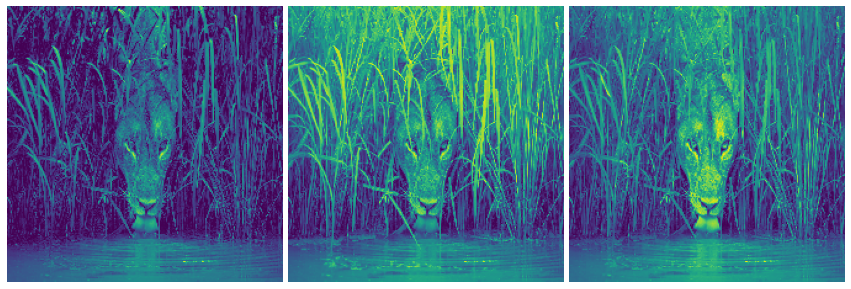

In [ ]:
# Visualise the input channels

import matplotlib.pyplot as plt

f1 = extracted_features[0] #The first input in the model (INPUT LAYER)
print('\n f1.shape : ', f1.shape)

img = f1[0,:] #Select only the first element of batch
print('Img shape: ', img.shape)
plt.figure(figsize=(15,15))
for n in range(3):
  ax = plt.subplot(1,3,n+1)
  plt.imshow(img[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02)


 f2.shape :  (1, 112, 112, 128)
Img shape:  (112, 112, 128)


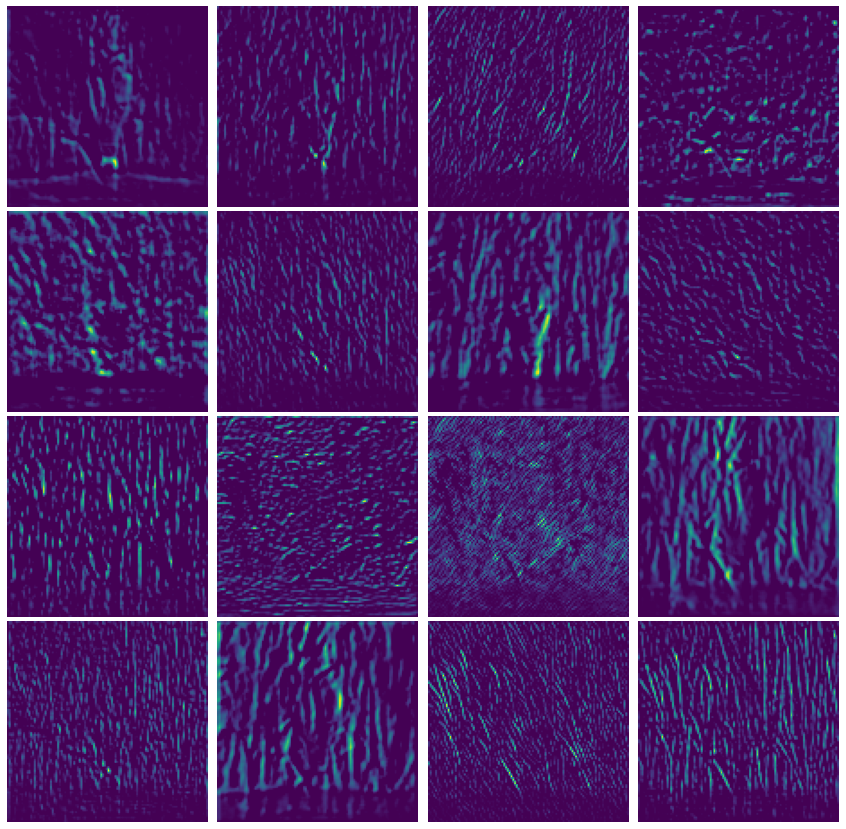

In [ ]:
# Visualise some features in the first hidden layer

f2 = extracted_features[5]
print('\n f2.shape : ', f2.shape)

img = f2[0,:] #Select only the first element of batch
print('Img shape: ', img.shape)
plt.figure(figsize=(15,15))
for n in range(16):
  ax = plt.subplot(4,4,n+1)
  plt.imshow(img[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02)

In [ ]:
# Build a model to extract features by layer name

extracted_features_block1_pool = Model(
    inputs=features.input,
    outputs=features.get_layer('block1_pool').output
)

block1_pool_features = extracted_features_block1_pool.predict(x)

Img shape:  (112, 112, 64)


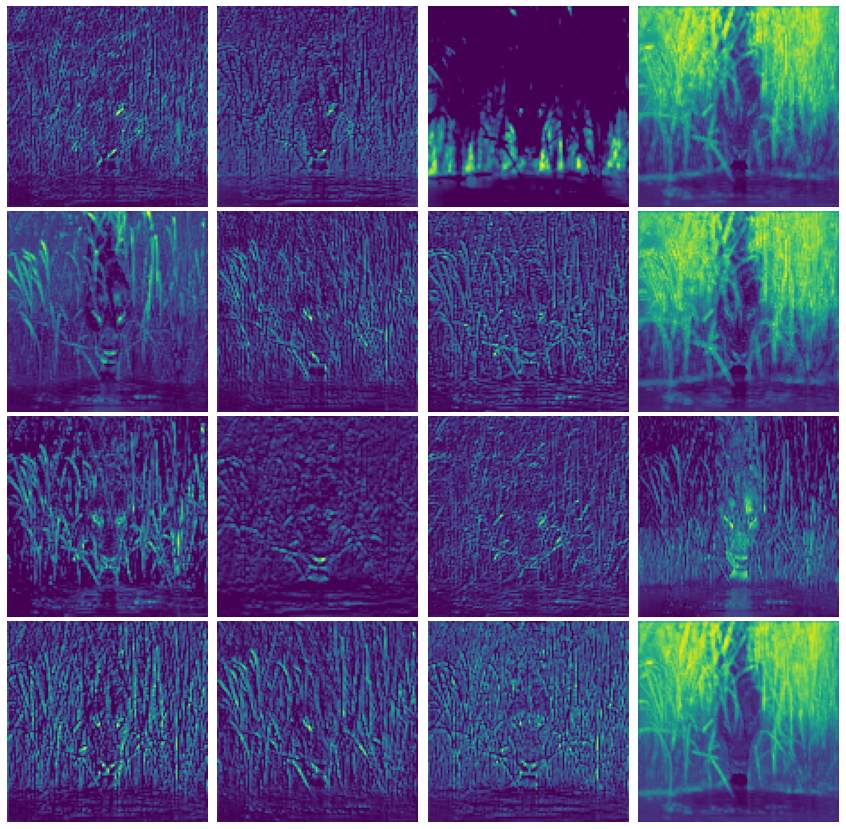

In [ ]:
# Visualise some features from the extracted layer output


img = block1_pool_features[0,:] #Select only the first element of batch
print('Img shape: ', img.shape)
plt.figure(figsize=(15,15))
for n in range(16):
  ax = plt.subplot(4,4,n+1)
  plt.imshow(img[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02)

In [ ]:
# Extract features from a layer deeper in the network

extracted_features_block4_conv = Model(
    inputs=features.input,
    outputs=features.get_layer('block4_conv4').output
)

block4_conv_features = extracted_features_block4_conv.predict(x)

Img shape:  (28, 28, 512)


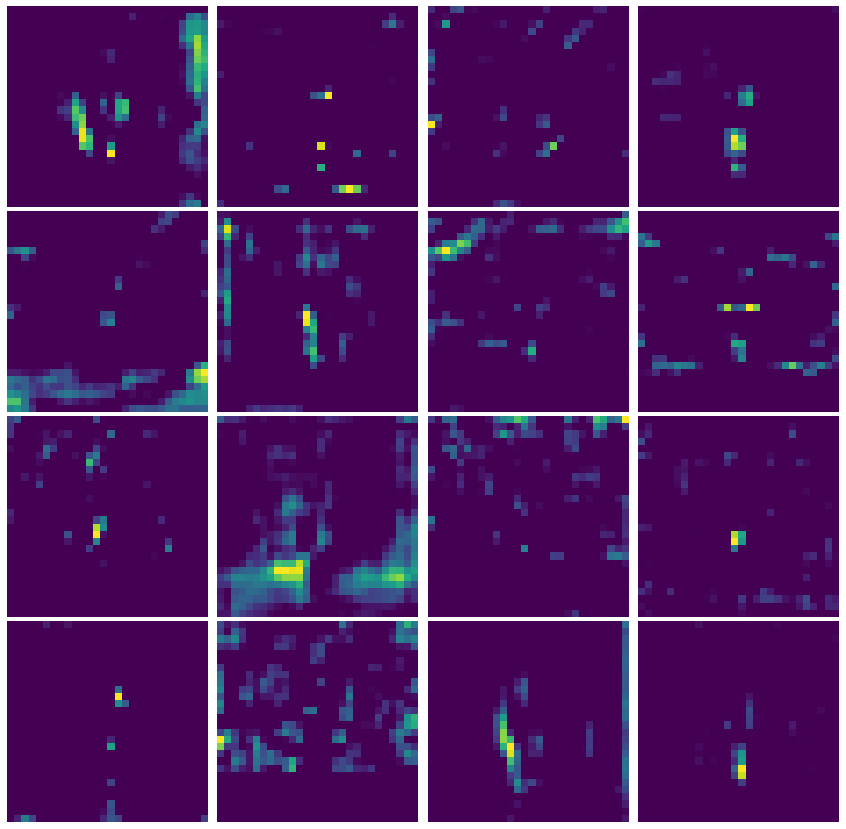

In [ ]:
# Visualise some features from the extracted layer output

img = block4_conv_features[0,:] #Select only the first element of batch
print('Img shape: ', img.shape)
plt.figure(figsize=(15,15))
for n in range(16):
  ax = plt.subplot(4,4,n+1)
  plt.imshow(img[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02)

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [78]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [79]:
# Display the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [96]:
def get_weights(model):
  return [layer.weights[0].numpy() for layer in model.layers]

def get_biases(model):
  return [layer.bias.numpy() for layer in model.layers]

def plot_delta_weights(model, W0_layers, b0_layers, W1_layers, b1_layers):
  plt.figure(figsize=(8,8))
  for n in range(3):
      delta_l = W1_layers[n] - W0_layers[n]
      print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
      ax = plt.subplot(1,3,n+1)
      plt.imshow(delta_l)
      plt.title('Layer '+str(n))
      plt.axis('off')
  plt.colorbar()
  plt.suptitle('Weight matrices variation');

In [91]:
# Retrieve the weights and biases

W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [81]:
model.layers[0].weights[1]

<tf.Variable 'dense_6/bias:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

In [82]:
model.layers[0].bias

<tf.Variable 'dense_6/bias:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

In [92]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [93]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [94]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_biases(model)

Layer 0: bias variation:  0.0136697125
Layer 1: bias variation:  0.005427935
Layer 2: bias variation:  0.045493517


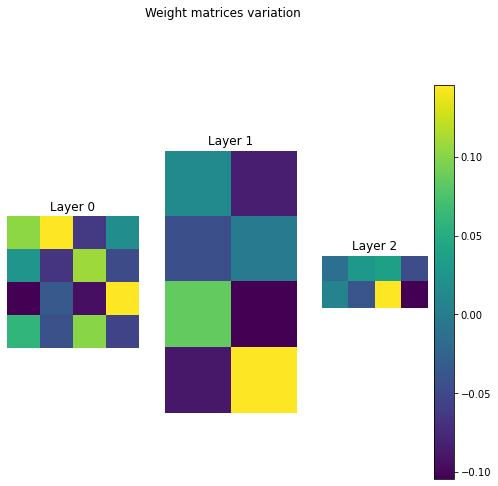

In [97]:
# Plot the variation

plot_delta_weights(model, W0_layers, b0_layers, W1_layers, b1_layers)

#### Freeze layers at build time

In [99]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [100]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [101]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', trainable=False), # Contains two variables bias and weights
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [102]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [103]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [104]:
# Retrieve weights and biases

W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [105]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [107]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_biases(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.14343196
Layer 2: bias variation:  0.29141918


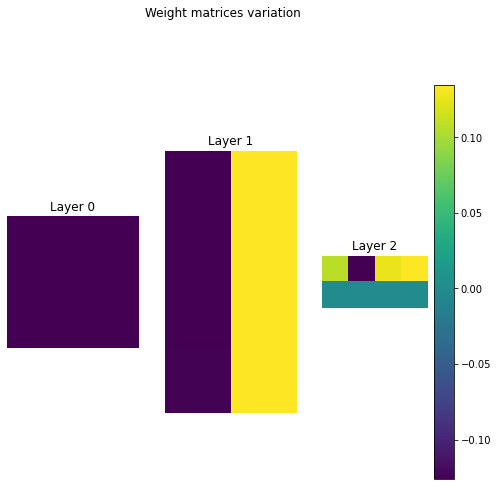

In [109]:
# Plot the variation

plot_delta_weights(model, W0_layers, b0_layers, W1_layers, b1_layers)

#### Freeze layers of a pre-built model

In [110]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [111]:
# Freeze the second layer

model.layers[1].trainable = False

In [112]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [113]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [114]:
# Retrieve weights and biases

W2_layers = get_weights(model)
b2_layers = get_biases(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.18949963


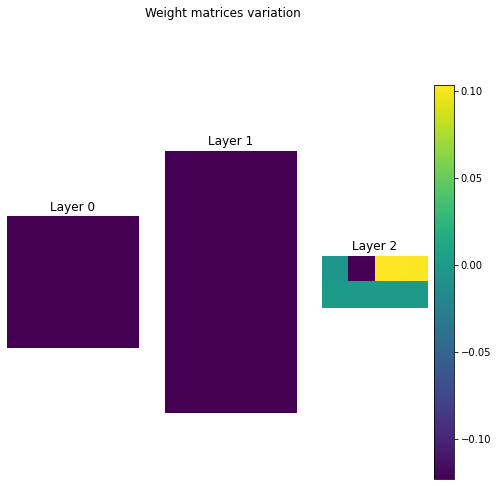

In [115]:
# Plot the variation

plot_delta_weights(model, W1_layers, b1_layers, W2_layers, b2_layers)